# Analysis on Flight Delays

This notebook was created to analyze which factor caused flight delays. The analysis was conducted by 3 categories: Month, airport, and airline.

## 1. Dataset

- Source: Bureau of Transportation Statistics    
- 'Airline On-Time Statistics and Delay Causes Data' from Sep 2022 to Aug 2023
- Reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The combination of year, month, airport, and airline is unique in the table
- Contains scheduled and actual departure and arrival times, reason of delay

## 2. Data Dictionary

- year: The year that the activity happened
- month: The month that the activity happened
- carrier: 2-letter carrier code defined by IATA (International Air Transport Association)
- carrier_name: Carrier name in English
- airport: 3-letter airport code defined by IATA (International Air Transport Association)
- airport_name: Airport name in English
- arr_flights: Number of flights arrived
- arr_del15: Number of flights delayed (arrived more than 15 minutes than the scheduled time)
- carrier_ct: Number of delayed flights due to the carrier's circumstances
- weather_ct: Number of delayed flights due to the weather
- nas_ct: Number of delayed flights due to National Aviation System such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control
- security_ct: Number of delayed flights due to security reason (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas)
- late_aircraft_ct: Number of delayed flights when the previous flight with same aircraft arrived late
- arr_cancelled: Number of flights that have been cancelled
- arr_diverted: Number of flights that have been diverted
- arr_delay: Total time (minutes) of delayed flights
- carrier_delay: Total time (minutes) of delayed flights due to the carrier's circumstances
- weather_delay: Total time (minutes) of delayed flights due to the weather
- nas_delay: Total time (minutes) of delayed flights due to NAS resason
- security_delay: Total time (minutes) of delayed flights due to security reason
- late_aircraft_delay: Total time (minutes) of delayed flights due to the previous late flight

## 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

## 4. Import Data

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [3]:
df.shape

(19115, 21)

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19115 entries, 0 to 19114
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 19115 non-null  int64  
 1   month                19115 non-null  int64  
 2   carrier              19115 non-null  object 
 3   carrier_name         19115 non-null  object 
 4   airport              19115 non-null  object 
 5   airport_name         19115 non-null  object 
 6   arr_flights          19095 non-null  float64
 7   arr_del15            19093 non-null  float64
 8   carrier_ct           19095 non-null  float64
 9   weather_ct           19095 non-null  float64
 10  nas_ct               19095 non-null  float64
 11  security_ct          19095 non-null  float64
 12  late_aircraft_ct     19095 non-null  float64
 13  arr_cancelled        19095 non-null  float64
 14  arr_diverted         19095 non-null  float64
 15  arr_delay            19095 non-null 

In [6]:
df.isnull().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            20
arr_del15              22
carrier_ct             20
weather_ct             20
nas_ct                 20
security_ct            20
late_aircraft_ct       20
arr_cancelled          20
arr_diverted           20
arr_delay              20
carrier_delay          20
weather_delay          20
nas_delay              20
security_delay         20
late_aircraft_delay    20
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3880,2023,6,MQ,Envoy Air,CLL,"College Station/Bryan, TX: Easterwood Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,2023,6,MQ,Envoy Air,EUG,"Eugene, OR: Mahlon Sweet Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3898,2023,6,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3904,2023,6,MQ,Envoy Air,GRB,"Green Bay, WI: Green Bay Austin Straubel International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3910,2023,6,MQ,Envoy Air,HPN,"White Plains, NY: Westchester County",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3931,2023,6,MQ,Envoy Air,MLI,"Moline, IL: Quad Cities International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,2023,6,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3955,2023,6,MQ,Envoy Air,ROC,"Rochester, NY: Frederick Douglass Grtr Rochester International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3956,2023,6,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4285,2023,6,OO,SkyWest Airlines Inc.,MLU,"Monroe, LA: Monroe Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop the rows if it has at least one null value in any column
df.dropna(inplace=True)

In [9]:
df.shape

(19093, 21)

## 5. EDA

In [10]:
df_summary = df.loc[:, ~df.columns.isin(['year', 'month'])].describe().round(2)
df_summary

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00,19093.00
mean,355.04,75.90,26.22,2.71,19.32,0.22,27.42,6.59,0.89,5267.19,1934.74,286.07,938.71,10.36,2097.31
std,987.30,206.63,63.25,9.00,60.21,0.90,85.99,29.53,3.83,16392.07,5968.34,1025.53,3271.41,46.47,7219.95
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,46.00,7.00,2.66,0.00,0.99,0.00,1.51,0.00,0.00,404.00,135.00,0.00,27.00,0.00,78.00
50%,93.00,19.00,7.56,0.67,3.61,0.00,5.24,1.00,0.00,1176.00,451.00,29.00,143.00,0.00,358.00
75%,240.00,53.00,21.47,2.00,11.57,0.00,17.37,4.00,1.00,3439.00,1416.00,187.00,500.00,0.00,1309.00
max,20084.00,4142.00,1293.91,266.42,1074.87,24.46,2069.07,1356.00,125.00,438783.00,162563.00,25206.00,72056.00,1477.00,227959.00


### 1) Maximum value of each column

In [11]:
# create a function that returns a row that has the maximum number in a certain column
def find_max(col):
    print("Maximun number in '" + col + "' column")
    display(df[df[col] == max(df[col])][['year', 'month', 'carrier_name', 'airport_name', col]])
    print('') # make a space for each output to distinguish each category

In [12]:
col_names = df_summary.columns

In [13]:
for col in col_names:
    find_max(col)

Maximun number in 'arr_flights' column


,year,month,carrier_name,airport_name,arr_flights
1939,2023,7,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta International",20084.0



Maximun number in 'arr_del15' column


,year,month,carrier_name,airport_name,arr_del15
1684,2023,7,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",4142.0



Maximun number in 'carrier_ct' column


,year,month,carrier_name,airport_name,carrier_ct
1939,2023,7,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta International",1293.91



Maximun number in 'weather_ct' column


,year,month,carrier_name,airport_name,weather_ct
3237,2023,6,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",266.42



Maximun number in 'nas_ct' column


,year,month,carrier_name,airport_name,nas_ct
13688,2022,12,United Air Lines Inc.,"Newark, NJ: Newark Liberty International",1074.87



Maximun number in 'security_ct' column


,year,month,carrier_name,airport_name,security_ct
224,2023,8,Alaska Airlines Inc.,"Anchorage, AK: Ted Stevens Anchorage International",24.46



Maximun number in 'late_aircraft_ct' column


,year,month,carrier_name,airport_name,late_aircraft_ct
1684,2023,7,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",2069.07



Maximun number in 'arr_cancelled' column


,year,month,carrier_name,airport_name,arr_cancelled
13790,2022,12,Southwest Airlines Co.,"Denver, CO: Denver International",1356.0



Maximun number in 'arr_diverted' column


,year,month,carrier_name,airport_name,arr_diverted
379,2023,8,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta International",125.0



Maximun number in 'arr_delay' column


,year,month,carrier_name,airport_name,arr_delay
1684,2023,7,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",438783.0



Maximun number in 'carrier_delay' column


,year,month,carrier_name,airport_name,carrier_delay
1684,2023,7,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",162563.0



Maximun number in 'weather_delay' column


,year,month,carrier_name,airport_name,weather_delay
3237,2023,6,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",25206.0



Maximun number in 'nas_delay' column


,year,month,carrier_name,airport_name,nas_delay
3055,2023,7,United Air Lines Inc.,"Newark, NJ: Newark Liberty International",72056.0



Maximun number in 'security_delay' column


,year,month,carrier_name,airport_name,security_delay
9992,2023,2,Allegiant Air,"Sanford, FL: Orlando Sanford International",1477.0



Maximun number in 'late_aircraft_delay' column


,year,month,carrier_name,airport_name,late_aircraft_delay
1684,2023,7,American Airlines Inc.,"Dallas/Fort Worth, TX: Dallas/Fort Worth International",227959.0


### 2) Delays by month

In [14]:
# Sum number of delays by month
df_month = df.groupby(['year', 'month']).sum('arr_del15').reset_index()
df_month

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,9,557494.0,90875.0,34276.13,3255.64,22660.47,232.88,30449.88,8699.0,1067.0,5696444.0,2339152.0,265125.0,978210.0,10076.0,2103881.0
1,2022,10,572285.0,90057.0,34717.91,1994.90,22647.60,268.56,30428.40,4830.0,963.0,5574478.0,2302903.0,213171.0,966002.0,11989.0,2080413.0
2,2022,11,546410.0,102278.0,37076.14,3062.30,27986.61,289.16,33863.73,6189.0,1022.0,6420695.0,2544438.0,323303.0,1148848.0,11634.0,2392472.0
3,2022,12,557095.0,142407.0,51978.36,6361.02,33323.32,382.68,50361.36,30582.0,1297.0,10404589.0,3939386.0,758005.0,1529986.0,17790.0,4159422.0
4,2023,1,538837.0,116713.0,39142.99,4369.53,34126.91,376.77,38696.96,10295.0,1345.0,8104993.0,2860559.0,511666.0,1709669.0,17069.0,3006030.0
5,2023,2,502749.0,92969.0,33007.70,3187.71,25286.44,244.72,31242.43,9019.0,983.0,6146091.0,2392270.0,367524.0,1083548.0,14177.0,2288572.0
6,2023,3,580322.0,136044.0,43648.31,3842.32,39346.93,412.42,48793.75,7406.0,1383.0,8771003.0,3051310.0,413739.0,1822085.0,18438.0,3465431.0
7,2023,4,561441.0,125882.0,41685.81,4042.99,32995.24,390.61,46767.73,9589.0,1603.0,8693470.0,3018861.0,447230.0,1731052.0,18018.0,3478309.0
8,2023,5,579958.0,104119.0,37572.76,3091.68,25002.30,346.38,38105.86,3310.0,1218.0,6761775.0,2612269.0,294695.0,1090068.0,16662.0,2748081.0
9,2023,6,577262.0,152268.0,49849.72,6200.11,37257.73,479.73,58481.00,12219.0,2239.0,11460948.0,4010319.0,630539.0,2045265.0,22268.0,4752557.0


In [15]:
# Combine year and month columns together and drop year and month columns for easy view
df_month['year-month'] = df_month['year'].astype(str) + '-' + df_month['month'].apply(lambda x: f'{x:02d}' if x <= 10 else str(x))
df_month = df_month.drop(['year', 'month'], axis = 1)

# Reorder columns in the dataframe: Move 'year-month' to the left side of the dataframe
cols = list(df_month.columns)
cols = [cols[-1]] + cols[:-1]
df_month = df_month[cols]
df_month

,year-month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022-09,557494.0,90875.0,34276.13,3255.64,22660.47,232.88,30449.88,8699.0,1067.0,5696444.0,2339152.0,265125.0,978210.0,10076.0,2103881.0
1,2022-10,572285.0,90057.0,34717.91,1994.90,22647.60,268.56,30428.40,4830.0,963.0,5574478.0,2302903.0,213171.0,966002.0,11989.0,2080413.0
2,2022-11,546410.0,102278.0,37076.14,3062.30,27986.61,289.16,33863.73,6189.0,1022.0,6420695.0,2544438.0,323303.0,1148848.0,11634.0,2392472.0
3,2022-12,557095.0,142407.0,51978.36,6361.02,33323.32,382.68,50361.36,30582.0,1297.0,10404589.0,3939386.0,758005.0,1529986.0,17790.0,4159422.0
4,2023-01,538837.0,116713.0,39142.99,4369.53,34126.91,376.77,38696.96,10295.0,1345.0,8104993.0,2860559.0,511666.0,1709669.0,17069.0,3006030.0
5,2023-02,502749.0,92969.0,33007.70,3187.71,25286.44,244.72,31242.43,9019.0,983.0,6146091.0,2392270.0,367524.0,1083548.0,14177.0,2288572.0
6,2023-03,580322.0,136044.0,43648.31,3842.32,39346.93,412.42,48793.75,7406.0,1383.0,8771003.0,3051310.0,413739.0,1822085.0,18438.0,3465431.0
7,2023-04,561441.0,125882.0,41685.81,4042.99,32995.24,390.61,46767.73,9589.0,1603.0,8693470.0,3018861.0,447230.0,1731052.0,18018.0,3478309.0
8,2023-05,579958.0,104119.0,37572.76,3091.68,25002.30,346.38,38105.86,3310.0,1218.0,6761775.0,2612269.0,294695.0,1090068.0,16662.0,2748081.0
9,2023-06,577262.0,152268.0,49849.72,6200.11,37257.73,479.73,58481.00,12219.0,2239.0,11460948.0,4010319.0,630539.0,2045265.0,22268.0,4752557.0


In [16]:
# Find the percentage of delayed flights
# There is a risk to use the absolute number of delayed flights because the number of flights delayed may be proportional to the number of flights arrived
df_month_perc = df_month[['year-month', 'arr_flights', 'arr_del15']]
df_month_perc['del_perc'] = round(df_month['arr_del15'] / df_month['arr_flights'], 2)
df_month_perc

,year-month,arr_flights,arr_del15,del_perc
0,2022-09,557494.0,90875.0,0.16
1,2022-10,572285.0,90057.0,0.16
2,2022-11,546410.0,102278.0,0.19
3,2022-12,557095.0,142407.0,0.26
4,2023-01,538837.0,116713.0,0.22
5,2023-02,502749.0,92969.0,0.18
6,2023-03,580322.0,136044.0,0.23
7,2023-04,561441.0,125882.0,0.22
8,2023-05,579958.0,104119.0,0.18
9,2023-06,577262.0,152268.0,0.26


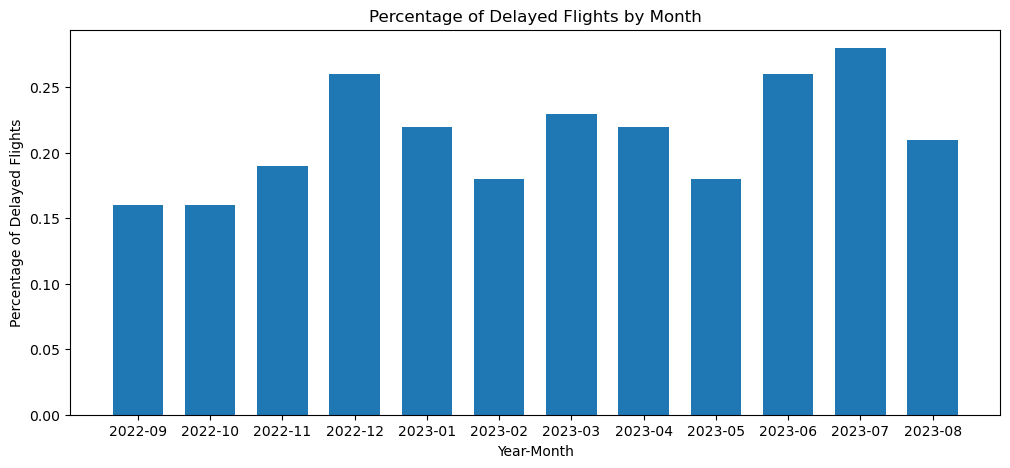

In [17]:
# Cearte a bar chart to see the trend

# Adjust the width
fig = plt.figure(figsize=(12, 5))

plt.bar(df_month_perc['year-month'], df_month_perc['del_perc'], width=0.7)

plt.xlabel('Year-Month')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Percentage of Delayed Flights by Month')

plt.show()

In July 2023, there was the highest percentage of flight delays, followed by December 2022 and June 2023.

### 3) Delays by Airport

In [18]:
df_airport = df.groupby(['airport', 'airport_name']).sum('arr_del15').reset_index()
df_airport

,airport,airport_name,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",103156,333,4227.0,911.0,363.45,83.92,153.72,2.77,307.13,46.0,6.0,69250.0,26273.0,9514.0,8038.0,379.0,25046.0
1,ABI,"Abilene, TX: Abilene Regional",24272,78,1406.0,208.0,58.14,15.15,59.22,2.00,73.51,17.0,4.0,11384.0,2726.0,1702.0,2219.0,78.0,4659.0
2,ABQ,"Albuquerque, NM: Albuquerque International Sunport",228557,761,22267.0,4991.0,1885.98,133.66,789.12,10.64,2171.59,318.0,24.0,271271.0,97494.0,10127.0,30855.0,269.0,132526.0
3,ABR,"Aberdeen, SD: Aberdeen Regional",24272,78,711.0,72.0,50.00,22.00,0.00,0.00,0.00,22.0,3.0,4963.0,2713.0,2250.0,0.0,0.0,0.0
4,ABY,"Albany, GA: Southwest Georgia Regional",24272,78,890.0,78.0,34.37,6.12,16.34,0.00,21.16,2.0,5.0,5396.0,2917.0,438.0,603.0,0.0,1438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,XNA,"Fayetteville, AR: Northwest Arkansas Regional",22242,99,831.0,146.0,65.02,9.70,29.31,0.00,41.97,5.0,1.0,7870.0,3720.0,402.0,1040.0,0.0,2708.0
384,XWA,"Williston, ND: Williston Basin International",24272,78,1607.0,236.0,178.00,23.00,1.00,1.00,33.00,55.0,15.0,17280.0,11125.0,2397.0,75.0,21.0,3662.0
385,YAK,"Yakutat, AK: Yakutat Airport",24272,78,724.0,118.0,14.54,7.78,22.70,0.00,72.97,12.0,18.0,5786.0,694.0,473.0,822.0,0.0,3797.0
386,YKM,"Yakima, WA: Yakima Air Terminal/McAllister Field",8088,42,126.0,26.0,12.63,3.02,4.32,0.00,6.03,2.0,0.0,1488.0,481.0,575.0,123.0,0.0,309.0


In [19]:
# Calculate the percentage of delayed flights by airport
df_airport_perc = df_airport[['airport', 'airport_name', 'arr_flights', 'arr_del15']]
df_airport_perc['del_perc'] = round(df_airport['arr_del15'] / df_airport['arr_flights'], 2)

# Order by percentage of delayed flights in a descending order 
df_airport_perc = df_airport_perc.sort_values('del_perc', ascending = False).reset_index(drop = True)

# Show only top 10 airports with del_perc
df_airport_perc.head(10)

,airport,airport_name,arr_flights,arr_del15,del_perc
0,IFP,"Bullhead City, AZ: Laughlin/Bullhead International",1.0,1.0,1.00
1,PVU,"Provo, UT: Provo Municipal",1918.0,876.0,0.46
2,PSE,"Ponce, PR: Mercedita",1088.0,490.0,0.45
3,BQN,"Aguadilla, PR: Rafael Hernandez",2844.0,1157.0,0.41
4,SCK,"Stockton, CA: Stockton Metro",501.0,204.0,0.41
5,SCK,"Stockton, CA: Stockton Metropolitan",56.0,23.0,0.41
6,SMX,"Santa Maria, CA: Santa Maria Public/Capt. G. Allan Hancock Field",110.0,37.0,0.34
7,TTN,"Trenton, NJ: Trenton Mercer",2009.0,659.0,0.33
8,SJU,"San Juan, PR: Luis Munoz Marin International",31906.0,10272.0,0.32
9,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",5504.0,1713.0,0.31


The result has a problem because airports with small number of arrived flights may have a very high percentage even though there were only a few delays. For example, airport IFP has 100% of delay because it had only one arriving flight and it was delayed. Therefore, I decided to set a threshold to filter the data.

In [20]:
df_airport.describe().round(2)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00
mean,99531.96,325.84,17470.89,3734.87,1290.36,133.23,950.85,11.01,1349.43,324.53,43.80,259191.74,95205.94,14077.23,46192.68,509.64,103206.26
std,98373.35,319.97,43138.10,9185.15,2970.08,350.51,2700.95,28.65,3299.36,822.64,123.51,685721.94,249597.56,37850.47,141490.15,1322.65,270001.11
min,2022.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24272.00,78.00,672.00,94.75,49.70,8.95,6.94,0.00,23.98,13.00,2.00,7147.00,3098.75,728.75,317.25,0.00,1817.00
50%,50566.00,165.00,1911.00,361.00,168.96,26.12,63.92,1.00,98.02,36.00,8.00,24885.00,10834.00,3112.00,2941.50,37.50,7668.50
75%,158273.75,513.50,10359.25,2204.00,878.95,96.34,471.89,5.46,857.55,166.00,22.00,152147.50,55565.50,9897.25,19633.00,254.75,65093.25
max,349918.00,1145.00,330133.00,62783.00,20432.38,3778.01,18286.15,226.81,23880.16,6450.00,1143.00,5579178.00,2067250.00,407645.00,1016301.00,10614.00,2352402.00


After checking the mean and median of each columns, I decided to remove airports which has small number of arrived flights than the 25 percentile.

In [21]:
threshold = np.percentile(df_airport['arr_flights'], 25)

In [22]:
df_airport = df_airport[df_airport['arr_flights'] > threshold]
df_airport.describe().round(2)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00,291.00
mean,127065.51,415.28,23184.47,4961.97,1711.71,176.03,1265.44,14.64,1794.15,429.82,57.88,344312.62,126328.16,18603.84,61474.79,676.96,137228.87
std,99188.87,322.82,48500.38,10321.91,3325.54,395.72,3055.81,32.29,3705.80,926.58,139.86,773568.22,281510.63,42771.68,160555.60,1490.60,304364.89
min,18198.00,69.00,674.00,64.00,14.54,0.00,0.00,0.00,0.00,0.00,0.00,3921.00,659.00,0.00,0.00,0.00,0.00
25%,32361.50,108.00,1362.50,216.00,105.68,21.03,33.45,0.34,61.64,26.00,5.00,15642.00,7220.00,2198.00,1469.50,11.50,4475.00
50%,97088.00,330.00,4201.00,797.00,351.08,45.79,141.88,2.11,264.88,64.00,12.00,52352.00,23572.00,5389.00,6632.00,98.00,18431.00
75%,210356.00,685.50,16574.50,3673.50,1432.53,131.94,709.36,9.26,1355.48,289.50,32.50,230045.00,83972.00,14377.00,31786.00,418.50,94999.00
max,349918.00,1145.00,330133.00,62783.00,20432.38,3778.01,18286.15,226.81,23880.16,6450.00,1143.00,5579178.00,2067250.00,407645.00,1016301.00,10614.00,2352402.00


In [23]:
# Calculate the percentage of delayed flights by airport
df_airport_perc = df_airport[['airport', 'airport_name', 'arr_flights', 'arr_del15']]
df_airport_perc['del_perc'] = round(df_airport['arr_del15'] / df_airport['arr_flights'], 2)
df_airport_perc = df_airport_perc.sort_values('del_perc', ascending = False).reset_index(drop = True)

In [24]:
# Show the top 20 airport based on del_perc
df_airport_perc.head(20)

,airport,airport_name,arr_flights,arr_del15,del_perc
0,PVU,"Provo, UT: Provo Municipal",1918.0,876.0,0.46
1,PSE,"Ponce, PR: Mercedita",1088.0,490.0,0.45
2,BQN,"Aguadilla, PR: Rafael Hernandez",2844.0,1157.0,0.41
3,TTN,"Trenton, NJ: Trenton Mercer",2009.0,659.0,0.33
4,SJU,"San Juan, PR: Luis Munoz Marin International",31906.0,10272.0,0.32
5,AZA,"Phoenix, AZ: Phoenix - Mesa Gateway",5504.0,1713.0,0.31
6,PGD,"Punta Gorda, FL: Punta Gorda Airport",5850.0,1813.0,0.31
7,SFB,"Sanford, FL: Orlando Sanford International",8978.0,2791.0,0.31
8,FNT,"Flint, MI: Bishop International",2083.0,632.0,0.30
9,ASE,"Aspen, CO: Aspen Pitkin County Sardy Field",6642.0,1911.0,0.29


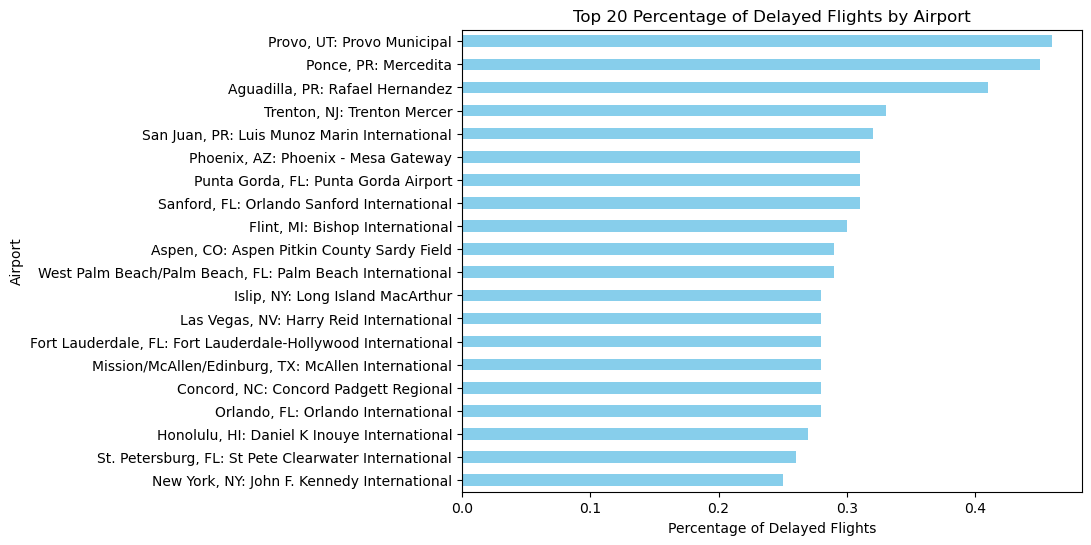

In [25]:
# Visualize the result with a graph
ax = df_airport_perc.head(20).sort_values('del_perc', ascending = True).plot(kind='barh', x='airport_name', y='del_perc', color='skyblue', legend=False, figsize=(8, 6))

ax.set_xlabel('Percentage of Delayed Flights')
ax.set_ylabel('Airport')
ax.set_title('Top 20 Percentage of Delayed Flights by Airport')

plt.show()

### 4) Delays by Airline

In [26]:
df_airline = df.groupby(['carrier', 'carrier_name']).sum('arr_del15').reset_index()
df_airline

,carrier,carrier_name,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,2309884,7379,202640.0,30994.0,8391.85,1313.35,11079.43,16.87,10192.45,4673.0,430.0,2370069.0,720214.0,199207.0,619081.0,862.0,830705.0
1,AA,American Airlines Inc.,2959171,9503,930265.0,223353.0,68071.62,8334.52,55383.38,677.59,90885.73,12713.0,2535.0,19222057.0,6746695.0,840364.0,2508717.0,33417.0,9092864.0
2,AS,Alaska Airlines Inc.,2077286,6663,243317.0,51106.0,13126.86,1396.13,19324.21,433.24,16825.59,3974.0,790.0,2649810.0,807585.0,120818.0,713894.0,15606.0,991907.0
3,B6,JetBlue Airways,1587797,5107,281860.0,87677.0,33817.11,1544.75,23324.05,246.53,28744.55,6926.0,1130.0,7071501.0,2879671.0,177076.0,1235842.0,12708.0,2766204.0
4,DL,Delta Air Lines Inc.,3434501,10949,958928.0,166192.0,68234.02,5296.47,44145.36,178.67,48337.50,12912.0,2022.0,11812756.0,5840516.0,619265.0,1966976.0,10326.0,3375673.0
5,F9,Frontier Airlines Inc.,1966012,6409,167905.0,56426.0,17534.77,921.87,15022.16,0.00,22947.35,5049.0,307.0,4360140.0,1389817.0,114277.0,782868.0,0.0,2073178.0
6,G4,Allegiant Air,2979390,9562,114675.0,32816.0,7865.62,1867.47,10021.27,128.25,12933.52,1791.0,354.0,2591793.0,783567.0,249543.0,558468.0,8075.0,992140.0
7,HA,Hawaiian Airlines Inc.,511734,1647,79150.0,22923.0,11251.27,478.63,1594.97,92.52,9505.55,1025.0,90.0,1140112.0,558547.0,40458.0,58086.0,3134.0,479887.0
8,MQ,Envoy Air,3161408,10221,223704.0,41786.0,9942.57,3104.58,13842.18,114.32,14782.41,3003.0,497.0,2554107.0,626601.0,293585.0,598166.0,4544.0,1031211.0
9,NK,Spirit Air Lines,1484647,4735,257405.0,73892.0,21238.62,2422.20,31418.50,876.67,17936.20,6207.0,530.0,5345542.0,1543770.0,212217.0,2017486.0,38492.0,1533577.0


In [27]:
# Calculate the percenatge of delays by airline
df_airline_perc = df_airline[['carrier', 'carrier_name', 'arr_flights', 'arr_del15']]
df_airline_perc['del_perc'] = round(df_airline['arr_del15'] / df_airline['arr_flights'], 2)

# Order the dataframe by del_perc in a descending order
df_airline_perc = df_airline_perc.sort_values('del_perc', ascending = False).reset_index(drop = True)
df_airline_perc

,carrier,carrier_name,arr_flights,arr_del15,del_perc
0,F9,Frontier Airlines Inc.,167905.0,56426.0,0.34
1,B6,JetBlue Airways,281860.0,87677.0,0.31
2,G4,Allegiant Air,114675.0,32816.0,0.29
3,HA,Hawaiian Airlines Inc.,79150.0,22923.0,0.29
4,NK,Spirit Air Lines,257405.0,73892.0,0.29
5,AA,American Airlines Inc.,930265.0,223353.0,0.24
6,WN,Southwest Airlines Co.,1398068.0,315747.0,0.23
7,AS,Alaska Airlines Inc.,243317.0,51106.0,0.21
8,UA,United Air Lines Inc.,705530.0,151442.0,0.21
9,MQ,Envoy Air,223704.0,41786.0,0.19


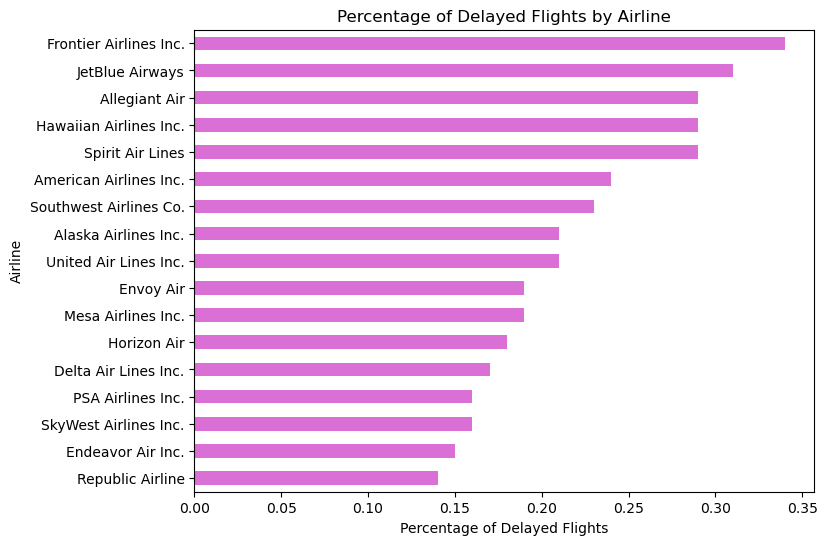

In [28]:
# Draw a graph to see the result
ax = df_airline_perc.sort_values('del_perc', ascending = True).plot(kind='barh', x='carrier_name', y='del_perc', color='orchid', legend=False, figsize=(8, 6))

ax.set_xlabel('Percentage of Delayed Flights')
ax.set_ylabel('Airline')
ax.set_title('Percentage of Delayed Flights by Airline')

plt.show()

### 5) Delays by Cause

In [29]:
df_delay = pd.DataFrame(df[['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum())
df_delay = df_delay.reset_index().rename(columns = {0:'count', 'index':'cause'})
df_delay

,cause,count
0,arr_del15,1449131.00
1,carrier_ct,500658.40
2,weather_ct,51693.12
3,nas_ct,368929.10
4,security_ct,4272.84
5,late_aircraft_ct,523578.24


In [30]:
# Calculate the percentage of flight delays by cause
df_delay['perc'] = round(df_delay['count'] / df_delay.loc[0, 'count'], 3)

# Drop the first row (the total number of delayed flights
df_delay = df_delay.drop(0)

# Order the table by 'perc' in a descending order
df_delay = df_delay.sort_values('perc', ascending = False).reset_index(drop = True)
df_delay

,cause,count,perc
0,late_aircraft_ct,523578.24,0.361
1,carrier_ct,500658.40,0.345
2,nas_ct,368929.10,0.255
3,weather_ct,51693.12,0.036
4,security_ct,4272.84,0.003


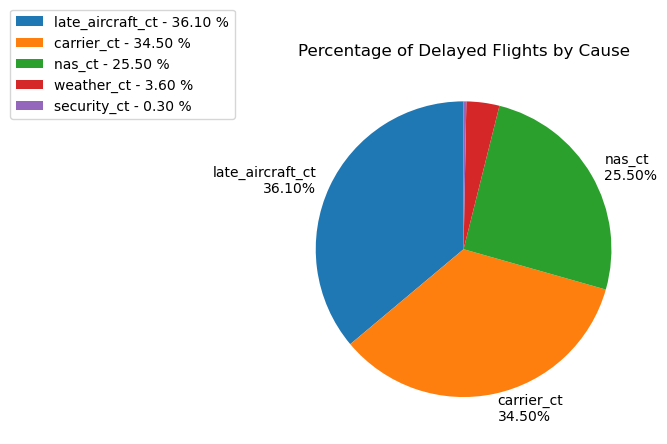

In [31]:
x = df_delay['cause']
y = df_delay['perc']
percent = y * 100

patches, texts, = plt.pie(y, startangle=90, radius=1, pctdistance=0.85)

# Get the top 3 indices based on percentage values
top_indices = percent.argsort()[-3:][::-1]

# Add labels for the top 3 chunks
for i, idx in enumerate(top_indices):
    texts[idx].set_text(f'{x[idx]}\n{percent[idx]:.2f}%')
    texts[idx].set_fontsize(10)

# Add a legend
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.1, 1.), fontsize=10)

# Add a title
# ax.set_title('Percentage of Delayed Flights by Cause')
plt.title('Percentage of Delayed Flights by Cause')

# plt.tight_layout()
plt.show()

Before the analysis, I had thought weather would be the most frequent reason for flight delays. However, it turned out that weather takes up only less than 5%. The most frequent cause for flight delay was late aircraft, followed by carrier and nas.

### 6) Delays by Month & Cause

In [32]:
df_month_cause = df_month.iloc[:, :8]
df_month_cause

,year-month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,2022-09,557494.0,90875.0,34276.13,3255.64,22660.47,232.88,30449.88
1,2022-10,572285.0,90057.0,34717.91,1994.90,22647.60,268.56,30428.40
2,2022-11,546410.0,102278.0,37076.14,3062.30,27986.61,289.16,33863.73
3,2022-12,557095.0,142407.0,51978.36,6361.02,33323.32,382.68,50361.36
4,2023-01,538837.0,116713.0,39142.99,4369.53,34126.91,376.77,38696.96
5,2023-02,502749.0,92969.0,33007.70,3187.71,25286.44,244.72,31242.43
6,2023-03,580322.0,136044.0,43648.31,3842.32,39346.93,412.42,48793.75
7,2023-04,561441.0,125882.0,41685.81,4042.99,32995.24,390.61,46767.73
8,2023-05,579958.0,104119.0,37572.76,3091.68,25002.30,346.38,38105.86
9,2023-06,577262.0,152268.0,49849.72,6200.11,37257.73,479.73,58481.00


In [33]:
# Create a function to find the most frequent cause of flight delays among the five reasons
def get_max_column(row):
    return row.idxmax()

In [34]:
# Create a new column called 'top_cause' to allocate the most frequent reason for the delays by month
df_month_cause['top_cause'] = df_month_cause[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].apply(get_max_column, axis=1)
df_month_cause

,year-month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,top_cause
0,2022-09,557494.0,90875.0,34276.13,3255.64,22660.47,232.88,30449.88,carrier_ct
1,2022-10,572285.0,90057.0,34717.91,1994.90,22647.60,268.56,30428.40,carrier_ct
2,2022-11,546410.0,102278.0,37076.14,3062.30,27986.61,289.16,33863.73,carrier_ct
3,2022-12,557095.0,142407.0,51978.36,6361.02,33323.32,382.68,50361.36,carrier_ct
4,2023-01,538837.0,116713.0,39142.99,4369.53,34126.91,376.77,38696.96,carrier_ct
5,2023-02,502749.0,92969.0,33007.70,3187.71,25286.44,244.72,31242.43,carrier_ct
6,2023-03,580322.0,136044.0,43648.31,3842.32,39346.93,412.42,48793.75,late_aircraft_ct
7,2023-04,561441.0,125882.0,41685.81,4042.99,32995.24,390.61,46767.73,late_aircraft_ct
8,2023-05,579958.0,104119.0,37572.76,3091.68,25002.30,346.38,38105.86,late_aircraft_ct
9,2023-06,577262.0,152268.0,49849.72,6200.11,37257.73,479.73,58481.00,late_aircraft_ct


The result is very interesting that the most frequent reasons were divided the data into two. Compared to other reasons, carrier and late_aircraft have pretty similar values.

In [35]:
# Color the cells with its values
df_month_cause.style.background_gradient(axis=1, subset=(df_month_cause.index[:],
            df_month_cause.columns[df_month_cause.columns.get_loc('carrier_ct'):df_month_cause.columns.get_loc('late_aircraft_ct')+1])).format(precision=0)

,year-month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,top_cause
0,2022-09,557494,90875,34276,3256,22660,233,30450,carrier_ct
1,2022-10,572285,90057,34718,1995,22648,269,30428,carrier_ct
2,2022-11,546410,102278,37076,3062,27987,289,33864,carrier_ct
3,2022-12,557095,142407,51978,6361,33323,383,50361,carrier_ct
4,2023-01,538837,116713,39143,4370,34127,377,38697,carrier_ct
5,2023-02,502749,92969,33008,3188,25286,245,31242,carrier_ct
6,2023-03,580322,136044,43648,3842,39347,412,48794,late_aircraft_ct
7,2023-04,561441,125882,41686,4043,32995,391,46768,late_aircraft_ct
8,2023-05,579958,104119,37573,3092,25002,346,38106,late_aircraft_ct
9,2023-06,577262,152268,49850,6200,37258,480,58481,late_aircraft_ct


When the dataframe was colored, it is more obvious that there is a huge difference between columns carrier, late_aircraft, nas and weather, security values. The table was colored by every row's values. When the color is darker, it means that the value is bigger.

### 7) Delays by Airport & Cause

In [36]:
df_airport_cause = df_airport.iloc[:, :11]
df_airport_cause = df_airport_cause.drop(['year', 'month'], axis = 1)
df_airport_cause

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",4227.0,911.0,363.45,83.92,153.72,2.77,307.13
1,ABI,"Abilene, TX: Abilene Regional",1406.0,208.0,58.14,15.15,59.22,2.00,73.51
2,ABQ,"Albuquerque, NM: Albuquerque International Sunport",22267.0,4991.0,1885.98,133.66,789.12,10.64,2171.59
3,ABR,"Aberdeen, SD: Aberdeen Regional",711.0,72.0,50.00,22.00,0.00,0.00,0.00
4,ABY,"Albany, GA: Southwest Georgia Regional",890.0,78.0,34.37,6.12,16.34,0.00,21.16
...,...,...,...,...,...,...,...,...,...
382,XNA,"Fayetteville, AR: Northwest Arkansas National",10104.0,2090.0,721.88,120.85,522.85,7.63,716.77
383,XNA,"Fayetteville, AR: Northwest Arkansas Regional",831.0,146.0,65.02,9.70,29.31,0.00,41.97
384,XWA,"Williston, ND: Williston Basin International",1607.0,236.0,178.00,23.00,1.00,1.00,33.00
385,YAK,"Yakutat, AK: Yakutat Airport",724.0,118.0,14.54,7.78,22.70,0.00,72.97


In [37]:
df_airport_cause['top_cause'] = df_airport_cause[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].apply(get_max_column, axis=1)
df_airport_cause

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,top_cause
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",4227.0,911.0,363.45,83.92,153.72,2.77,307.13,carrier_ct
1,ABI,"Abilene, TX: Abilene Regional",1406.0,208.0,58.14,15.15,59.22,2.00,73.51,late_aircraft_ct
2,ABQ,"Albuquerque, NM: Albuquerque International Sunport",22267.0,4991.0,1885.98,133.66,789.12,10.64,2171.59,late_aircraft_ct
3,ABR,"Aberdeen, SD: Aberdeen Regional",711.0,72.0,50.00,22.00,0.00,0.00,0.00,carrier_ct
4,ABY,"Albany, GA: Southwest Georgia Regional",890.0,78.0,34.37,6.12,16.34,0.00,21.16,carrier_ct
...,...,...,...,...,...,...,...,...,...,...
382,XNA,"Fayetteville, AR: Northwest Arkansas National",10104.0,2090.0,721.88,120.85,522.85,7.63,716.77,carrier_ct
383,XNA,"Fayetteville, AR: Northwest Arkansas Regional",831.0,146.0,65.02,9.70,29.31,0.00,41.97,carrier_ct
384,XWA,"Williston, ND: Williston Basin International",1607.0,236.0,178.00,23.00,1.00,1.00,33.00,carrier_ct
385,YAK,"Yakutat, AK: Yakutat Airport",724.0,118.0,14.54,7.78,22.70,0.00,72.97,late_aircraft_ct


In [38]:
# Calculate the proportion of top causes
df_airport_cause['top_cause'].value_counts(normalize=True)

top_cause
carrier_ct          0.666667
late_aircraft_ct    0.288660
nas_ct              0.044674
Name: proportion, dtype: float64

It has different result compared to just summing the values without grouping by airport.

### 8) Delays by Airline & Cause

In [39]:
df_airline_cause = df_airline.loc[:, df_airline.columns.isin(['carrier_name', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct'])]
df_airline_cause

,carrier_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,Endeavor Air Inc.,30994.0,8391.85,1313.35,11079.43,16.87,10192.45
1,American Airlines Inc.,223353.0,68071.62,8334.52,55383.38,677.59,90885.73
2,Alaska Airlines Inc.,51106.0,13126.86,1396.13,19324.21,433.24,16825.59
3,JetBlue Airways,87677.0,33817.11,1544.75,23324.05,246.53,28744.55
4,Delta Air Lines Inc.,166192.0,68234.02,5296.47,44145.36,178.67,48337.50
5,Frontier Airlines Inc.,56426.0,17534.77,921.87,15022.16,0.00,22947.35
6,Allegiant Air,32816.0,7865.62,1867.47,10021.27,128.25,12933.52
7,Hawaiian Airlines Inc.,22923.0,11251.27,478.63,1594.97,92.52,9505.55
8,Envoy Air,41786.0,9942.57,3104.58,13842.18,114.32,14782.41
9,Spirit Air Lines,73892.0,21238.62,2422.20,31418.50,876.67,17936.20


In [40]:
df_airline_cause['top_cause'] = df_airline_cause[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].apply(get_max_column, axis=1)
df_airline_cause

,carrier_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,top_cause
0,Endeavor Air Inc.,30994.0,8391.85,1313.35,11079.43,16.87,10192.45,nas_ct
1,American Airlines Inc.,223353.0,68071.62,8334.52,55383.38,677.59,90885.73,late_aircraft_ct
2,Alaska Airlines Inc.,51106.0,13126.86,1396.13,19324.21,433.24,16825.59,nas_ct
3,JetBlue Airways,87677.0,33817.11,1544.75,23324.05,246.53,28744.55,carrier_ct
4,Delta Air Lines Inc.,166192.0,68234.02,5296.47,44145.36,178.67,48337.50,carrier_ct
5,Frontier Airlines Inc.,56426.0,17534.77,921.87,15022.16,0.00,22947.35,late_aircraft_ct
6,Allegiant Air,32816.0,7865.62,1867.47,10021.27,128.25,12933.52,late_aircraft_ct
7,Hawaiian Airlines Inc.,22923.0,11251.27,478.63,1594.97,92.52,9505.55,carrier_ct
8,Envoy Air,41786.0,9942.57,3104.58,13842.18,114.32,14782.41,late_aircraft_ct
9,Spirit Air Lines,73892.0,21238.62,2422.20,31418.50,876.67,17936.20,nas_ct


In [41]:
df_airline_cause.style.background_gradient(axis=1, subset=(df_airline_cause.index[:],
            df_airline_cause.columns[df_airline_cause.columns.get_loc('carrier_ct'):df_airline_cause.columns.get_loc('late_aircraft_ct')+1])).format(precision=0)

,carrier_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,top_cause
0,Endeavor Air Inc.,30994,8392,1313,11079,17,10192,nas_ct
1,American Airlines Inc.,223353,68072,8335,55383,678,90886,late_aircraft_ct
2,Alaska Airlines Inc.,51106,13127,1396,19324,433,16826,nas_ct
3,JetBlue Airways,87677,33817,1545,23324,247,28745,carrier_ct
4,Delta Air Lines Inc.,166192,68234,5296,44145,179,48338,carrier_ct
5,Frontier Airlines Inc.,56426,17535,922,15022,0,22947,late_aircraft_ct
6,Allegiant Air,32816,7866,1867,10021,128,12934,late_aircraft_ct
7,Hawaiian Airlines Inc.,22923,11251,479,1595,93,9506,carrier_ct
8,Envoy Air,41786,9943,3105,13842,114,14782,late_aircraft_ct
9,Spirit Air Lines,73892,21239,2422,31418,877,17936,nas_ct


The table was colored by every row's values. When the color is darker, it means that the value is bigger. From this dataframe, the audience can find easily what factor impacted the most and the least for delays for each airline.

In [42]:
df_airline_cause['top_cause'].value_counts(normalize=True)

top_cause
late_aircraft_ct    0.470588
carrier_ct          0.294118
nas_ct              0.235294
Name: proportion, dtype: float64

It has the same order as I calculated without grouping by airline.